## Mean Shift 군집화

* Mean Shift는 KDE(Kernel Density Estimation)를 이용하여 데이터 포인트들이 데이퍼 분포가 높은 곳으로 이동하면서 군집화를 수행
* 별도의 군집화 개수를 지정하지 않으며 Mean Shift는 데이터 분포도에 기반하여 자동으로 군집화 개수를 정함

### Mean Shift 수행 절차

1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도 계산
2. 데이터 분포도가 높은 방향으로 중심점 이동
3. 중심점을 따라 해당 데이터 이동
4. 이동된 데이터의 특정 반경내에 다시 데이터 분포 계산 후 2,3 step을 반복
5. 가장 분포도가 높은 곳으로 이동하면 더 이상 해당 데이터는 움직이지 않고 수렴
6. 모든 데이터를 1~5까지 수행하면서 군집 중심점을 찾음

* 특정 데이터가 반경내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동 할 때 주변 데이터들과의 거리값을 Kernel 함수 값으로 입력 한 뒤 그 반환값을 현재 위치에서 Update하면서 이동

### KDE(Kernel Density Estimation)

* KDE는 커널(Kernel)함수를 통해 어떤 변수의 확률밀도 함수를 추정하는 방식. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나누어서 확률 밀도 함수를 추정.
* 확률밀도함수(PDF : Probability Density Function) : 확률 변수의 분포를 나타내는 함수. 대표적으로 정규 분포, 감마 분포, t-분포 등이 있음
* 확률밀도 함수를 알게 되면 특정 변수가 어떤 값을 갖게 될지의 확률을 알게 됨을 의미. 즉 확률밀도 함수를 통해 변수의 특성(예를 들어 정규 분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있게 됨

### 확률 밀도 추정 방법

* 모수적(Parametric) 추정 : 데이터가 특정 데이터 분포(예를 들어 가우시안 분포)를 따른 다는 가정하에 데이터 분포를 찾는 방법. Gaussian Mixture 등이 있음
* 비모수적(Non-Parametric) 추정 : 데이터가 특정 분포를 따르지 않는다는 가정 하에서 밀도를 추정, 관측된 데이터 만으로 확률 밀도를 찾는 방법으로 대표적으로 KDE가 있음

### 비모수적 밀도 추정 - 히스토그램(Histogram)

* 히스토그램 밀도 추정의 문제점
    * Bin의 경계에서 불연속성이 나타남
    * Bin의 크기에 따라 히스토그램이 달라짐

### 비모수적 밀도 추정 - KDE

* KDE는 개별 관측 데이터들에 커널함수를 적용한 뒤, 커널함수들의 적용값을 모두 합한 뒤에 개별 관측 데이터의 건수로 나누어서 확률밀도 함수를 추정하는 방식임. 커널함수로는 대표적으로 가우시안 분포함수가 사용됨.

### KDE와 가우시안 커널함수

* KDE는 아래와 같은 커널함수 식으로 표현됨. 이때 K는 커널함수, x는 random variable, xi는 관측값, h는 bandwidth

* $ KDE = \frac{1}{n} \sum_{i=1}^{n}K_h(x-x_i) = \frac{1}{nh} \sum_{i=1}^{n}K(\frac{x-x_i}{h}) $

* 대표적인 커널함수는 가우시안 분포임. $ f(x| \mu, \sigma^2) = \frac{1}{ \sqrt{2\pi\sigma^2} }e^-\frac{(x-\mu)^2}{2\sigma^2} $

* 가우시안 커널함수를 적용한 KDE는 아래와 같음. 이 경우 관측값 xi는 평균, bandwidth h는 표준편차와 동일.
    * $ KDE = \frac{1}{nh} \sum_{i=1}^{n}\frac{1}{\sqrt{2}\pi h}e^(-\frac{1}{2}(\frac{x-x_i}{h})^2 ) $
    * 가우시안 커널함수를 적용할 경우 최적의 bandwidth는 아래와 같습니다.
        * $ h=(\frac{4\sigma^5}{3n})^\frac{1}{5} \approx 1.06\sigma n^-\frac{1}{5} $

### Bandwidth에 따른 KDE의 변화

* 작은 h값은 좁고 spike한 KDE로 변동성이 큰 확률밀도함수를 추정(오버피팅)
* 큰 h값은 과도하게 Smoothing된 KDE로 단순화된 확률밀도함수를 추정(언더피팅)

* Mean Shift는 Bandwidth가 클수록 적은 수의 클러스터링 중심점을, Bandwidth가 작을수록 많은 수의 클러스터링 중심점을 가지게 됨, 또한 Mean Shift는 군집의 개수를 지정하지 않으며, 오직 Bandwidth의 크기에 따라 군집화를 수행.

### 사이킷런 Mean Shift

* 사이킷런은 Mean Shift 군집화를 위해 MeanShift 클래스를 제공
* MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 해당 파라미터는 밀도 중심으로 이동 할때 사용되는 커널 함수의 bandwidth임. 이 bandwidth를 어떻게 설정하느냐에 따라 군집화 성능이 달라짐.
* 최적의 bandwidth 계산을 위해 사이킷런은 estimate_bandwidth()함수를 제공

---

### KDE(Kernel Density Estimation)의 이해

* seaborn의 distplot()을 이용하여 KDE 시각화
https://seaborn.pydata.org/tutorial/distributions.html

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

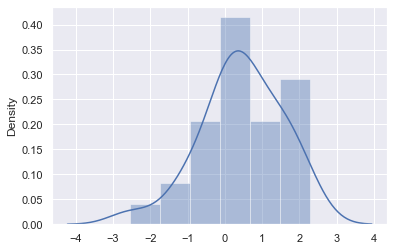

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)# 평균, 표준편차, ..
print(x)
sns.distplot(x)

C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

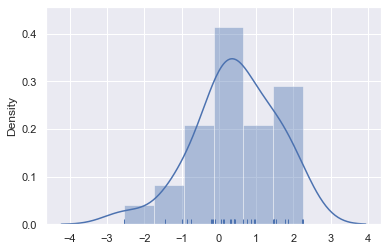

In [3]:
sns.distplot(x, rug=True) # kde, hist, rug plot이 다 사용 가능한 형태?..

<AxesSubplot:>

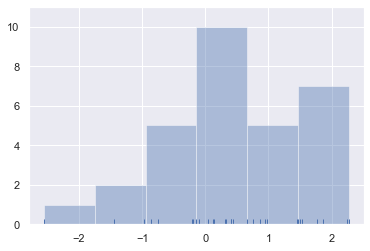

In [5]:
sns.distplot(x, kde=False, rug=True)

C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

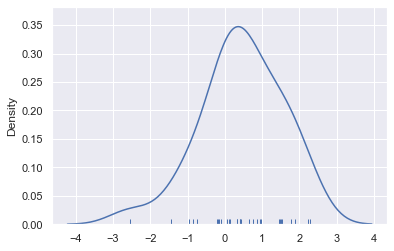

In [6]:
sns.distplot(x, hist=False, rug=True)

#### 개별 관측데이터에 대해 가우시안 커널 함수를 적용

<AxesSubplot:>

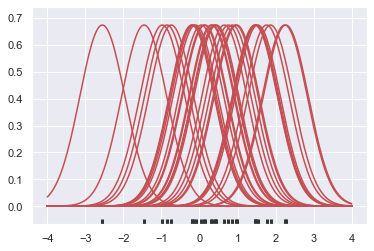

In [8]:
from scipy import stats

# x = np.random.normal(0, 1, size=30)
bandwidth = 1.08 * x.std() * x.size **(-1/5.)
support = np.linspace(-4, 4, 200) # -4부터 4까지를 200등분

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)# x_i = 개별관측값, 표준편차값으로 bandwidth...
    kernels.append(kernel)
    plt.plot(support, kernel, color='r') # 
    
sns.rugplot(x, color='.2', linewidth=3)


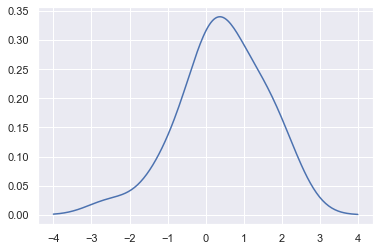

In [10]:
from scipy.integrate import trapz

density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

#### seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음

<AxesSubplot:ylabel='Density'>

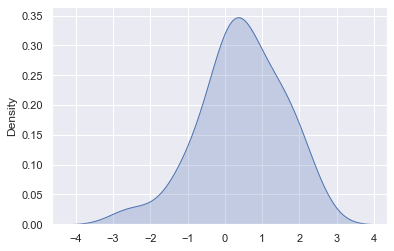

In [11]:
sns.kdeplot(x, shade=True)

#### bandwidth에 따른 KDE 변화

C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


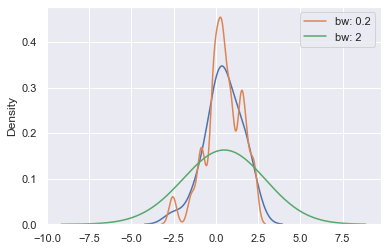

In [12]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label="bw: 0.2") # 오버피팅
sns.kdeplot(x, bw=2, label='bw: 2') # 언더피팅
plt.legend()

### 사이킷런을 이용한 Mean Shift

* make_blobs()을 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [13]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
# sample은 200개, feature는 2개, 군집 중심점은 3개

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :', np.unique(cluster_labels)) # np.unique -> 중복값을 없애서 보여줌

cluster labels 유형 : [0 1 2 3 4 5 6 7]


#### 커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행

In [14]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


#### 최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행

In [16]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.25) 
print('bandwidth : ', round(bandwidth, 3))

bandwidth :  1.689


In [18]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

C:\Users\aaaaaa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass bandwidth=1.6889636737559222 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


cluster labels 유형 :  [0 1 2]


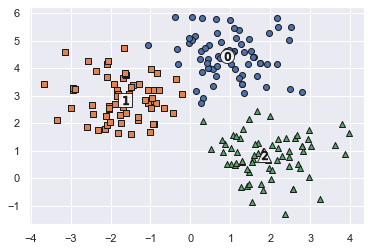

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers=meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중점 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [22]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64


* meanshift의 단점 : bandwidth 값에 민감
* 일반적으로 데이터마이닝보다는 영상쪽에 많이 사용됨(object tracking)